<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230901_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **3-(1) 데이터셋 만들기**

In [1]:
# 데이터셋 불러오기
# 워싱턴 주 면허부에 등록된 플러그인 하이브리드 및 전기차 데이터셋
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48.0,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43.0,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


### **3-(5) 전처리 수행**

In [2]:
# 결측값 확인
# 전체 데이터의 null 값의 개수
df.isnull().sum()

# County 22개, City 22개, Postal Code 22개
# Legislative District 327개, Vehicle Location 25개
# Electirc Utility 22개, 2020 Census Tract 22개

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

In [3]:
# 전체 데이터의 NaN 값의 개수
df.isna().sum()

# 전체 데이터의 결측값이 동일한 변수에 존재

VIN (1-10)                                             0
County                                                22
City                                                  22
State                                                  0
Postal Code                                           22
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 327
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                      22
2020 Census Tract                                     22
dtype: int64

In [4]:
# 전체 데이터의 중복값의 개수
df.duplicated().sum()

# 중복값 없음

0

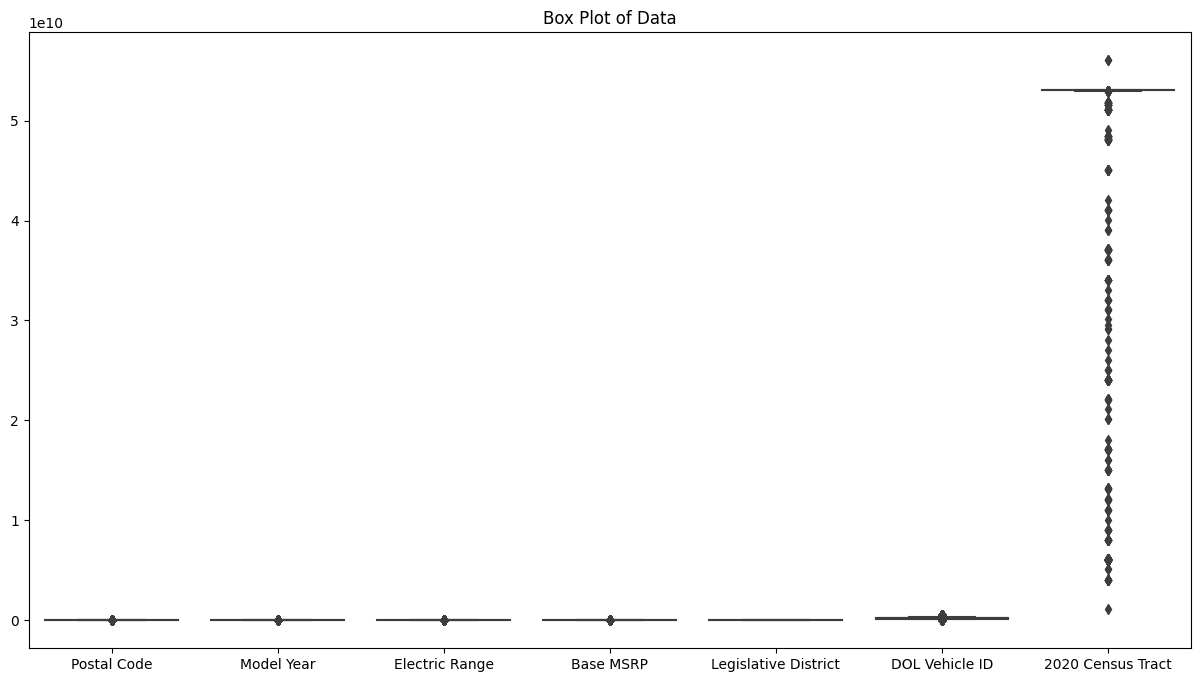

In [5]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 상자 그림
plt.figure(figsize=(15, 8))
sns.boxplot(data = df)
plt.title('Box Plot of Data')
plt.show()

# 수치형으로 된 변수들만 이상치 확인
# 202 Cecus Track 변수는 인구 조사 지역 관련 변수이므로 관측값의 수치가 매우 큼
# 따라서 해당 변수는 이상치에서 제외

# 수치형 변수에는 이상치 없음

In [6]:
# null, NaN 값 제거 후 df_cln에 저장
df_cln = df.dropna()
df_cln.isnull().sum()

# null 값 없음

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [7]:
df_cln.isna().sum()

# NaN 값 없음

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [8]:
# Model의 범주형 데이터를 수치형 데이터로 변환
# 원 핫 인코딩(One-Hot Encoding) 수행
import pandas as pd

# 원본 데이터 프레임에서 범주형 변수를 선택
ctgr = df_cln['Model']

# 원 핫 인코딩을 수행
one_ht_encd = pd.get_dummies(ctgr, prefix = 'Model')

# 결과 데이터 프레임에 추가
df_cd = pd.concat([df_cln, one_ht_encd], axis=1)
df_cd

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Model_TUCSON,Model_V60,Model_VOLT,Model_WHEEGO,Model_WRANGLER,Model_X3,Model_X5,Model_XC40,Model_XC60,Model_XC90
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,1,0,0,0
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0,0,0,0,0,0,0,0,0,0
143592,2C4RC1S76N,King,Clyde Hill,WA,98004.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
143593,1G1FZ6S02L,King,Seattle,WA,98104.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
143594,1G1RD6E40E,Spokane,Spokane,WA,99208.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# County, City, Model 각 변수의 관측값 확인
county = df_cd['County'].describe()
city = df_cd['City'].describe()
model = df_cd['Model'].describe()
print(county)
print('-' * 30)
print(city)
print('-' * 30)
print(model)

# City 변수의 대표값이 456개로 너무 많음
# Model 변수도 대표값이 127개로 너무 많음
# County, City, Model 빈도수가 제일 많은 순으로 상위 30개 대표값만 추출

count     143266
unique        39
top         King
freq       75383
Name: County, dtype: object
------------------------------
count      143266
unique        456
top       Seattle
freq        24662
Name: City, dtype: object
------------------------------
count      143266
unique        127
top       MODEL 3
freq        26684
Name: Model, dtype: object


In [10]:
# City, Model 빈도수 순 상위 30개 대표값 추출
import pandas as pd

# County 열의 빈도수 계산
cnty_cnts = df['County'].value_counts()

# City 열의 빈도수 계산
cty_cnts = df['City'].value_counts()

# Model 열의 빈도수 계산
mdl_cnts = df['Model'].value_counts()

# 빈도수가 가장 높은 상위 30개 대표값 추출
tp_cnty = cnty_cnts.head(30).index.tolist()
tp_cty = cty_cnts.head(30).index.tolist()
tp_mdl = mdl_cnts.head(30).index.tolist()

print(tp_cnty)
print(tp_cty)
print(tp_mdl)

['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston', 'Kitsap', 'Spokane', 'Whatcom', 'Benton', 'Skagit', 'Island', 'Clallam', 'Jefferson', 'Chelan', 'San Juan', 'Yakima', 'Cowlitz', 'Mason', 'Lewis', 'Grays Harbor', 'Kittitas', 'Franklin', 'Grant', 'Walla Walla', 'Douglas', 'Whitman', 'Klickitat', 'Okanogan', 'Stevens', 'Pacific']
['Seattle', 'Bellevue', 'Redmond', 'Vancouver', 'Bothell', 'Kirkland', 'Sammamish', 'Renton', 'Olympia', 'Tacoma', 'Bellingham', 'Issaquah', 'Spokane', 'Kent', 'Lynnwood', 'Mercer Island', 'Tukwila', 'Woodinville', 'Everett', 'Snohomish', 'Gig Harbor', 'Shoreline', 'Edmonds', 'Auburn', 'Bainbridge Island', 'Camas', 'Federal Way', 'Seatac', 'Maple Valley', 'Lake Stevens']
['MODEL 3', 'MODEL Y', 'LEAF', 'MODEL S', 'BOLT EV', 'MODEL X', 'VOLT', 'ID.4', 'NIRO', 'PRIUS PRIME', 'PACIFICA', 'WRANGLER', 'MUSTANG MACH-E', 'X5', 'I3', 'FUSION', 'EV6', 'C-MAX', 'IONIQ 5', 'RAV4 PRIME', 'R1T', 'XC90', 'BOLT EUV', 'E-GOLF', 'E-TRON', 'PRIUS PLUG-IN', 'XC60', '500', 'CLARI

### **3-(2)**

*   탐색적 데이터 분석(평균, 분산, 분포 시각화
) 수행
*   ML에 사용될 변수 정의, 종속변수, 독립변수 제시

In [11]:
# 평균, 분산, 분포 시각화 수행
# 분석목표 : 워싱턴 주의 군(행정단위구역)과 도시마다 선호하는 차량 모델이 있을까?
# 군, 도시에 많이 등록된 차량을 선호하는 차량으로 전제

# Model 변수(범주형)의 각 카테고리별 빈도수 계산
mdl = df_cd['Model'].value_counts()

# County 변수(범주형)의 각 카테고리별 빈도수 계산
cnty = df_cd['County'].value_counts()

# City 변수(범주형)의 각 카테고리별 빈도수 계산
cty = df_cd['City'].value_counts()

# 결과 출력
print(mdl)
print('-' * 30)
print(cnty)
print('-' * 30)
print(cty)

MODEL 3        26684
MODEL Y        26148
LEAF           13078
MODEL S         7523
BOLT EV         5593
               ...  
BENTAYGA           2
A8 E               2
918                1
FLYING SPUR        1
S-10 PICKUP        1
Name: Model, Length: 127, dtype: int64
------------------------------
King            75383
Snohomish       16429
Pierce          11017
Clark            8451
Thurston         5097
Kitsap           4725
Spokane          3542
Whatcom          3529
Benton           1756
Skagit           1599
Island           1593
Clallam           883
Jefferson         848
Chelan            844
San Juan          821
Yakima            782
Cowlitz           717
Mason             688
Lewis             554
Grays Harbor      513
Kittitas          484
Franklin          469
Grant             435
Walla Walla       350
Douglas           285
Whitman           249
Klickitat         234
Okanogan          198
Stevens           190
Pacific           167
Skamania          162
Asotin           

In [12]:
# 각 워싱턴 주의 도시별 차량 분포도
import pandas as pd

# 교차표 생성
cross_tab = pd.crosstab(df_cd['City'], df_cd['Model'])

# 피벗 테이블 생성
pivot_table = df.pivot_table(index='City', columns='Model', aggfunc='size', fill_value=0)

# 결과 출력
print("Cross Tabulation:")
print(cross_tab)

print("\nPivot Table:")
print(pivot_table)

Cross Tabulation:
Model           330E  500  530E  740E  745E  745LE  918  A3  A7  A8 E  ...  \
City                                                                   ...   
Aberdeen           0    3     2     0     0      0    0   0   0     0  ...   
Acme               0    0     0     0     0      0    0   0   0     0  ...   
Addy               0    0     0     0     0      0    0   0   0     0  ...   
Airway Heights     0    0     0     0     0      0    0   0   0     0  ...   
Alderdale          0    0     0     0     0      0    0   0   0     0  ...   
...              ...  ...   ...   ...   ...    ...  ...  ..  ..   ...  ...   
Yacolt             0    0     1     0     0      0    0   1   0     0  ...   
Yakima             0    4     1     0     0      0    0   0   0     0  ...   
Yarrow Point       0    0     1     0     0      0    0   2   0     0  ...   
Yelm               0    3     1     0     0      0    0   0   0     0  ...   
Zillah             0    0     0     0     0   

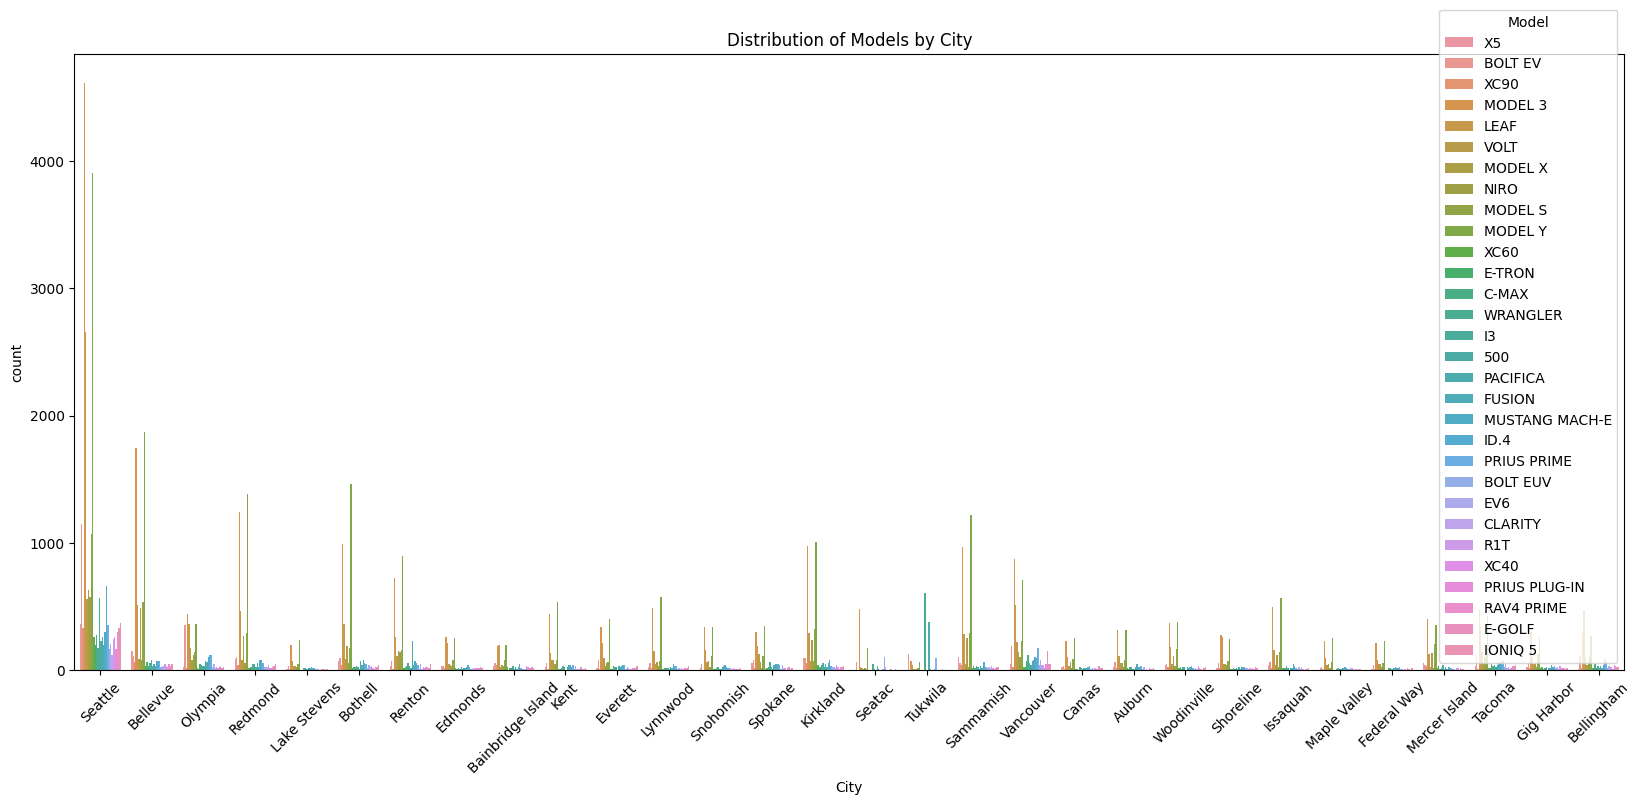

In [13]:
# 워싱턴 주의 도시별 차량 분포 시각화
# 상위 도시들에 해당하는 데이터프레임 추출
df_tp_cty = df[df['City'].isin(tp_cty)]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상위 도시와 모델들에 해당하는 데이터프레임 추출
df_tp = df_cd[df_cd['County'].isin(tp_cnty) & df_cd['City'].isin(tp_cty) & df_cd['Model'].isin(tp_mdl)]

# City와 Model 간의 분포를 heatmap으로 시각화
pivot_table = df_tp.pivot_table(index='City', columns='Model', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 8))
sns.countplot(data = df_tp, x = 'City', hue = 'Model')
plt.title('Distribution of Models by City')
plt.xticks(rotation=45)
plt.show()

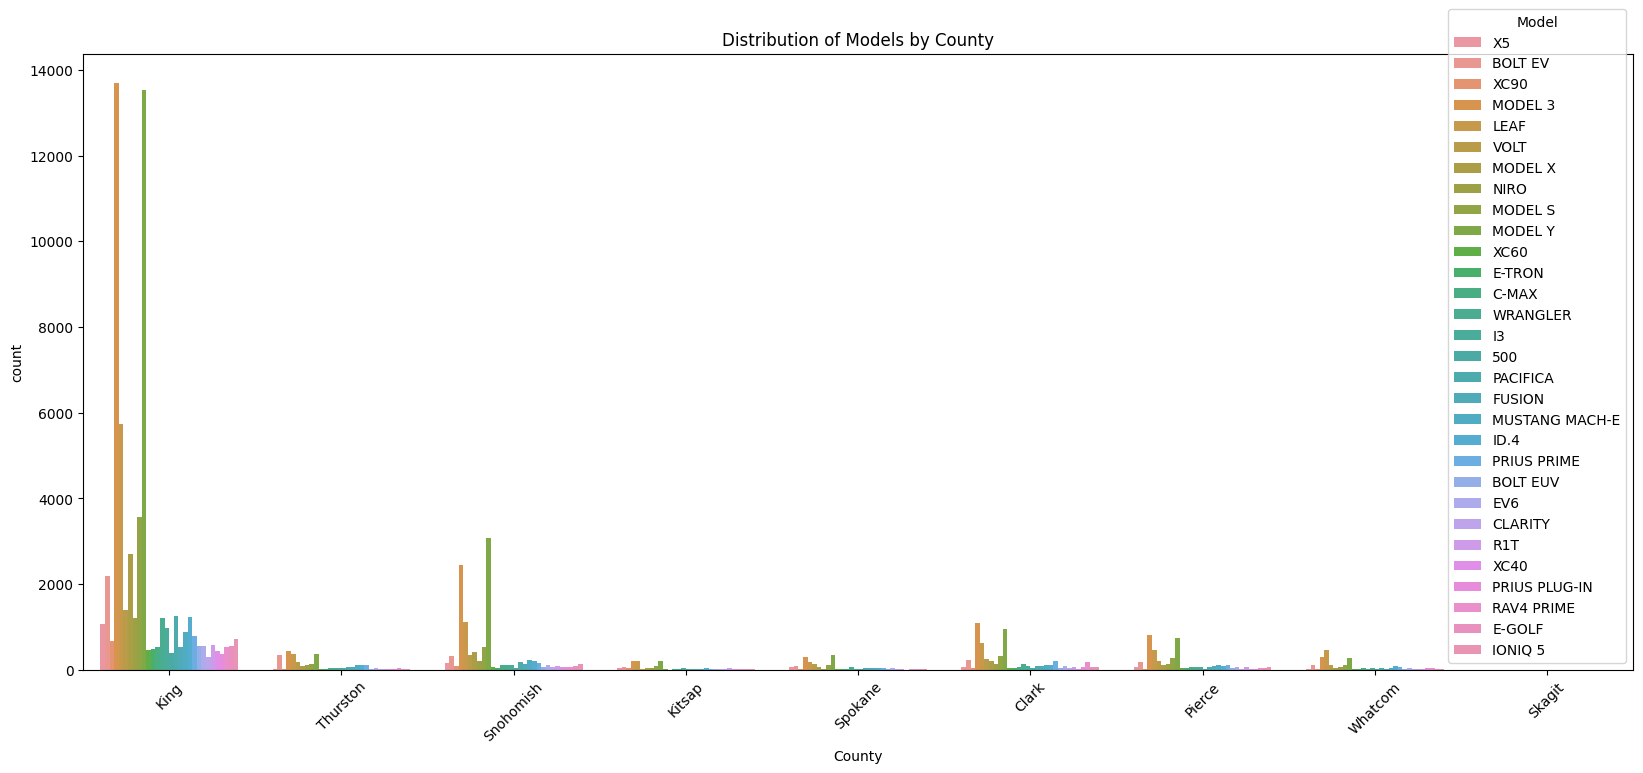

In [14]:
pvt_tabl = df_tp.pivot_table(index='County', columns='Model', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 8))
sns.countplot(data = df_tp, x = 'County', hue = 'Model')
plt.title('Distribution of Models by County')
plt.xticks(rotation=45)
plt.show()

In [15]:
# ML에 사용될 변수 정의, 종속변수, 독립변수 제시

# 변수 정의
# County : 워싱턴 주의 군(행정단위구역)
# City : 워싱턴 주의 도시
# Model : 차량 모델

# 종속변수
# Model

# 독립변수
# County, City

### **3-(3) 분석모형(분류, 회귀) 제시
**

In [16]:
# 분류 모델
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# County, City 변수는 범주형 변수

### **3-(4)**

*   상관관계 분석 수행
*   상관관계 분석 결과 제시 후 결과에 따라 독립변수의 수 제시

In [17]:
# 로지스틱 회귀분석
X = df[['County', 'City']]
y = df[['Model']]

print(X.head())
print('-' * 20)
print(y.head())

   County       City
0    King    Seattle
1  Yakima      Moxee
2    King    Seattle
3    King  Newcastle
4  Kitsap  Bremerton
--------------------
     Model
0       X5
1   ESCAPE
2  BOLT EV
3  MODEL S
4    C-MAX


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# test set 크기 30%

print(X_train.head()) # default 5개
print('-' * 30)
print(X_test.head())
print('-' * 30)
print(y_train.head())
print('-' * 30)
print(y_test.head())
print('-' * 30)

           County        City
12828        King     Seattle
66594   Snohomish    Mukilteo
47642   Snohomish     Bothell
747          King    Kirkland
130729    Whatcom  Bellingham
------------------------------
           County        City
76398      Island  Oak Harbor
139195  Snohomish     Bothell
105742       King     Seattle
8400         King     Tukwila
125160  Snohomish  Marysville
------------------------------
          Model
12828      XC90
66594        IX
47642   MODEL Y
747     MODEL 3
130729     LEAF
------------------------------
          Model
76398   MODEL 3
139195     ID.4
105742   E-GOLF
8400       LEAF
125160  MODEL Y
------------------------------


In [19]:
scaler = StandardScaler()
# StandardScaler() : 데이터의 표준화(Standardization)
# 각 특성(변수)의 평균을 0으로, 표준편차를 1로 만들어서
# 데이터의 분포를 표준 정규 분포에 가깝게 변환하는 과정

In [20]:
scaler.fit(X) # X를 fiting

ValueError: ignored

### **3-(6)**

1.   최소 3가지 ML 알고리즘 사용 데이터 분석 후 결과 제시
2.   ML 수행함에 있어 Performance 향상을 위해 노력(parameter tuning 등)

### **3-(7)**

1.   결과 해석, 가장 적절한 모형(best performance model) 제시
2.   적절한 모델을 어떻게 선택하였는지 결과(confusion matrix, RMSE, Y 예측값)와 설명 제시

3-(8)

*   상기 모든 과정 2p 요약 정리
*   6가지 사항 포함